<a href="https://colab.research.google.com/github/yando6/Data_Mining/blob/main/A_2109116016_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [ ]:
import pandas as pd
df = pd.read_csv('tabular.csv')
df


,whole milk,pastry,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegatables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.sum()
df.columns
# 2 Item set
from itertools import permutations #Library untuk buat kombinasi barang

# Extract unique items.
rules = list(permutations(df.columns, 2))
rules

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegatables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('

In [ ]:
# Filter yang ada item kombinasi yang muncul aja yang dihitung
rule_baru = []
for rule in rules:
  # Memfilter dengan nama kolom
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pastry'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegatables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegatables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hygiene articles', 'sausage'),
 ('rolls/buns', 'whole milk'),
 ('rolls

In [ ]:
hitung = {} #Ganti dictionary
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

{"('whole milk', 'pastry')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pastry', 'whole milk')": 1,
 "('pastry', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pastry')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegatables')": 1,
 "('soda', 'frankfurter')": 1,
 "('soda', 'whipped/sour cream')": 1,
 "('pickled vegatables', 'soda')": 1,
 "('can

In [ ]:
len(df)

19

In [ ]:
print("---")
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(df)*100}%")

---
('whole milk', 'pastry') support = 5.263157894736842%
('whole milk', 'salty snack') support = 5.263157894736842%
('whole milk', 'sausage') support = 10.526315789473683%
('whole milk', 'semi-finished bread') support = 5.263157894736842%
('whole milk', 'yogurt') support = 5.263157894736842%
('whole milk', 'soda') support = 5.263157894736842%
('whole milk', 'rolls/buns') support = 5.263157894736842%
('whole milk', 'butter') support = 5.263157894736842%
('pastry', 'whole milk') support = 5.263157894736842%
('pastry', 'salty snack') support = 5.263157894736842%
('salty snack', 'whole milk') support = 5.263157894736842%
('salty snack', 'pastry') support = 5.263157894736842%
('sausage', 'whole milk') support = 10.526315789473683%
('sausage', 'semi-finished bread') support = 5.263157894736842%
('sausage', 'yogurt') support = 5.263157894736842%
('sausage', 'hygiene articles') support = 5.263157894736842%
('sausage', 'rolls/buns') support = 10.526315789473683%
('semi-finished bread', 'whole 

In [ ]:
print("---")
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%")

---
whole milk->pastry  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sausage  Confidence = 40.0%
whole milk->semi-finished bread  Confidence = 20.0%
whole milk->yogurt  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pastry->whole milk  Confidence = 100.0%
pastry->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 100.0%
salty snack->pastry  Confidence = 100.0%
sausage->whole milk  Confidence = 50.0%
sausage->semi-finished bread  Confidence = 25.0%
sausage->yogurt  Confidence = 25.0%
sausage->hygiene articles  Confidence = 25.0%
sausage->rolls/buns  Confidence = 50.0%
semi-finished bread->whole milk  Confidence = 100.0%
semi-finished bread->sausage  Confidence = 100.0%
semi-finished bread->yogurt  Confidence = 100.0%
yogurt->whole milk  Confidence = 100.0%
yogurt->sausage  Confidence = 100.0%
yogurt->semi-finished bread  Confidence = 100.0%
soda->w

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

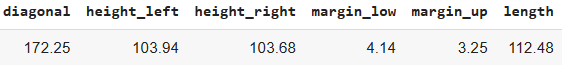
<!-- 1412 -->

In [ ]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi

import pandas as pd
import math

# dataset
data = pd.read_csv('deteksi_uang_palsu.csv')

# data target prediksi
target = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]

# hitung jarak Euclidean untuk setiap data pada dataset
jarak = []
for i in range(len(data)):
    dist = 0
    for j in range(1, len(data.columns)):
        dist += (data.iloc[i,j] - target[j-1])**2
    jarak.append(math.sqrt(dist))

# tambahkan kolom jarak pada dataset
data['jarak'] = jarak

# tampilkan hasil
data


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,0.671267
1,True,171.66,103.68,103.41,4.35,3.33,113.74,1.458321
2,True,172.23,104.00,103.35,4.43,2.95,113.12,0.834626
3,True,172.07,104.21,103.82,4.29,3.35,113.30,0.910934
4,True,171.79,104.57,104.04,4.26,3.15,113.46,1.312593
5,False,172.00,104.23,104.52,5.76,3.37,110.94,2.421281
6,False,171.56,104.03,103.93,5.47,3.50,111.67,1.741896
7,False,171.90,104.33,104.40,4.70,3.31,112.12,1.113463
8,False,171.84,104.06,104.10,4.87,3.25,111.04,1.722034
9,False,172.11,104.14,104.15,4.84,3.28,110.98,1.738217


In [ ]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

import pandas as pd
import math

# Membaca data
df = pd.read_csv("deteksi_uang_palsu.csv")

# Menambahkan kolom jarak untuk setiap data terhadap target prediksi
target = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]
df["jarak"] = ((df.diagonal - target[0])**2 + 
               (df.height_left - target[1])**2 +
               (df.height_right - target[2])**2 +
               (df.margin_low - target[3])**2 +
               (df.margin_up - target[4])**2 +
               (df.length - target[5])**2)**0.5

# Mengurutkan data berdasarkan jarak terdekat
k = int(math.sqrt(len(df)))
sorted_df = df.sort_values(by=["jarak"]).head(k)

# Menampilkan hasil pengurutan
sorted_df


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,0.671267
2,True,172.23,104.00,103.35,4.43,2.95,113.12,0.834626
3,True,172.07,104.21,103.82,4.29,3.35,113.30,0.910934


In [ ]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

import pandas as pd

# Load dataset
data = pd.read_csv("deteksi_uang_palsu.csv")

# Target prediksi
target = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]

# Hitung jarak Euclidean
data["jarak"] = (((data["diagonal"]-target[0])**2)+((data["height_left"]-target[1])**2)+((data["height_right"]-target[2])**2)+((data["margin_low"]-target[3])**2)+((data["margin_up"]-target[4])**2)+((data["length"]-target[5])**2))**(1/2)

# Urutkan data berdasarkan jarak terdekat
k = round(len(data)**0.5)  # K = akar 2 dari banyak data
data = data.sort_values("jarak")[:k]

# Tentukan hasil prediksi berdasarkan label terbanyak
prediksi = data["is_genuine"].value_counts().idxmax()
print("Hasil prediksi:", prediksi)


Hasil prediksi: True


# (3) Analisis

> Nama : Muhammad Fathan Hari

> Nim : 2109116016

> Judul : Alzheimer Disease and Healthy Aging Data In US

> Sumber : https://www.kaggle.com/datasets/ananthu19/alzheimer-disease-and-healthy-aging-data-in-us


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

In [ ]:
import pandas as pd

# Business Understanding

# Load dataset the dataset into a Pandas dataframe
df = pd.read_csv('Alzheimer Disease and Healthy Aging Data In US.csv')

# Melihat 5 baris pertama dari kerangka data
(df.head())

# Melihat bentuk kerangka data
(df.shape)

# Melihat nama kolom kerangka data
(df.columns)

# Melihat tipe data kolom
(df.dtypes)

# Melihat ringkasan statistik kerangka data
(df.describe())

df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2020,2020,HI,Hawaii,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15.0,AGE,5064,OVERALL,OVERALL
1,2017,2017,ID,Idaho,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C05,TMC03,Q27,16.0,AGE,5064,OVERALL,OVERALL
2,2017,2017,ID,Idaho,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C01,TOC11,Q43,16.0,AGE,5064,OVERALL,OVERALL
3,2018,2018,ID,Idaho,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,NaN,POINT (-114.36373 43.68263001),C01,TOC01,Q08,16.0,AGE,5064,OVERALL,OVERALL
4,2020,2020,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,Male,POINT (-86.14996019 39.76691045),C05,TMC03,Q27,18.0,AGE,AGE_OVERALL,GENDER,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58285,2016,2016,KY,Kentucky,BRFSS,Nutrition/Physical Activity/Obesity,No leisure-time physical activity within past ...,Percentage of older adults who have not had an...,%,PRCTG,...,NaN,POINT (-84.77497105 37.64597027),C02,TNC03,Q16,21.0,AGE,5064,OVERALL,OVERALL
58286,2020,2020,IA,Iowa,BRFSS,Screenings and Vaccines,Up-to-date with recommended vaccines and scree...,Percentage of older adult men who are up to da...,%,PRCTG,...,Hispanic,POINT (-93.81649056 42.46940091),C03,TSC10,Q10,19.0,AGE,65PLUS,RACE,HIS
58287,2019,2019,IN,Indiana,BRFSS,Cognitive Decline,Functional difficulties associated with subjec...,Percentage of older adults who reported subjec...,%,PRCTG,...,Female,POINT (-86.14996019 39.76691045),C06,TCC02,Q31,18.0,AGE,5064,GENDER,FEMALE
58288,2020,2020,KY,Kentucky,BRFSS,Screenings and Vaccines,Pap test within past 3 years,Percentage of older adult women with an intact...,%,PRCTG,...,"White, non-Hispanic",POINT (-84.77497105 37.64597027),C03,TSC03,Q20,21.0,AGE,5064,RACE,WHT


In [ ]:
# Melihat informasi umum dari dataset
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58290 entries, 0 to 58289
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  58290 non-null  int64  
 1   YearEnd                    58290 non-null  int64  
 2   LocationAbbr               58290 non-null  object 
 3   LocationDesc               58290 non-null  object 
 4   Datasource                 58290 non-null  object 
 5   Class                      58290 non-null  object 
 6   Topic                      58290 non-null  object 
 7   Question                   58290 non-null  object 
 8   Data_Value_Unit            58290 non-null  object 
 9   DataValueTypeID            58290 non-null  object 
 10  Data_Value_Type            58290 non-null  object 
 11  Data_Value                 38537 non-null  float64
 12  Data_Value_Alt             38537 non-null  float64
 13  Low_Confidence_Limit       38537 non-null  flo

In [ ]:
import pandas as pd

# Data Understanding

# Load the dataset into a Pandas dataframe
df = pd.read_csv('Alzheimer Disease and Healthy Aging Data In US.csv')

# Melihat 5 baris pertama dari kerangka data
(df.head())

# Melihat bentuk kerangka data
(df.shape)

# Melihat nama kolom kerangka data
(df.columns)

# Melihat tipe data kolom
(df.dtypes)

# Melihat ringkasan statistik kerangka data
(df.describe())

# Melihat jumlah nilai yang hilang di setiap kolom
(df.isnull().sum())

# Melihat jumlah nilai unik di setiap kolom
(df.nunique())

# Melihat matriks korelasi kerangka data
(df.corr())

df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2020,2020,HI,Hawaii,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15.0,AGE,5064,OVERALL,OVERALL
1,2017,2017,ID,Idaho,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C05,TMC03,Q27,16.0,AGE,5064,OVERALL,OVERALL
2,2017,2017,ID,Idaho,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C01,TOC11,Q43,16.0,AGE,5064,OVERALL,OVERALL
3,2018,2018,ID,Idaho,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,NaN,POINT (-114.36373 43.68263001),C01,TOC01,Q08,16.0,AGE,5064,OVERALL,OVERALL
4,2020,2020,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,Male,POINT (-86.14996019 39.76691045),C05,TMC03,Q27,18.0,AGE,AGE_OVERALL,GENDER,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58285,2016,2016,KY,Kentucky,BRFSS,Nutrition/Physical Activity/Obesity,No leisure-time physical activity within past ...,Percentage of older adults who have not had an...,%,PRCTG,...,NaN,POINT (-84.77497105 37.64597027),C02,TNC03,Q16,21.0,AGE,5064,OVERALL,OVERALL
58286,2020,2020,IA,Iowa,BRFSS,Screenings and Vaccines,Up-to-date with recommended vaccines and scree...,Percentage of older adult men who are up to da...,%,PRCTG,...,Hispanic,POINT (-93.81649056 42.46940091),C03,TSC10,Q10,19.0,AGE,65PLUS,RACE,HIS
58287,2019,2019,IN,Indiana,BRFSS,Cognitive Decline,Functional difficulties associated with subjec...,Percentage of older adults who reported subjec...,%,PRCTG,...,Female,POINT (-86.14996019 39.76691045),C06,TCC02,Q31,18.0,AGE,5064,GENDER,FEMALE
58288,2020,2020,KY,Kentucky,BRFSS,Screenings and Vaccines,Pap test within past 3 years,Percentage of older adult women with an intact...,%,PRCTG,...,"White, non-Hispanic",POINT (-84.77497105 37.64597027),C03,TSC03,Q20,21.0,AGE,5064,RACE,WHT


In [ ]:
import pandas as pd
import numpy as np

# Data Preparation

# Membaca dataset
df = pd.read_csv('Alzheimer Disease and Healthy Aging Data In US.csv')

# Mengganti nilai missing values dengan mean atau median
df['Data_Value'] = df['Data_Value'].fillna(df['Data_Value'].mean())
df['Low_Confidence_Limit'] = df['Low_Confidence_Limit'].fillna(df['Low_Confidence_Limit'].median())

# Menyeleksi data hanya pada tahun 2018
df = df[df['YearStart']==2018]

# Menyeleksi kolom-kolom yang akan digunakan
df = df[['YearStart', 'LocationDesc', 'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size', 'Stratification1', 'Stratification2']]

df


,YearStart,LocationDesc,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Stratification1,Stratification2
3,2018,Idaho,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,Mean,4.800000,4.0,5.5,NaN,50-64 years,NaN
9,2018,Iowa,Overall Health,Fall with injury within last year,Percentage of older adults who have fallen and...,%,Percentage,8.200000,7.1,9.4,NaN,65 years or older,NaN
13,2018,Kansas,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,Mean,4.900000,4.5,5.3,NaN,50-64 years,NaN
36,2018,Arizona,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,Number,Mean,5.800000,3.9,7.6,NaN,Overall,Hispanic
79,2018,Arizona,Nutrition/Physical Activity/Obesity,No leisure-time physical activity within past ...,Percentage of older adults who have not had an...,%,Percentage,27.000000,24.9,29.2,NaN,Overall,"White, non-Hispanic"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58271,2018,Iowa,Overall Health,Oral health: tooth retention,Percentage of older adults who report having l...,%,Percentage,37.258684,26.6,NaN,NaN,Overall,Native Am/Alaskan Native
58272,2018,Kentucky,Overall Health,Oral health: tooth retention,Percentage of older adults who report having l...,%,Percentage,68.000000,64.9,71.0,NaN,50-64 years,NaN
58276,2018,Indiana,Screenings and Vaccines,Colorectal cancer screening,Percentage of older adults who had either a ho...,%,Percentage,59.700000,55.9,63.4,NaN,50-64 years,Male
58281,2018,Kansas,Screenings and Vaccines,Up-to-date with recommended vaccines and scree...,Percentage of older adult men who are up to da...,%,Percentage,37.258684,26.6,NaN,NaN,50-64 years,Hispanic


Analisis Menggunakan CRISP-DM

1. Bussiness Understanding
* Determine Business Objectives :
    - Menganalisis faktor risiko dan hubungan dengan Alzheimer
    - Membantu pengembangan program pencegahan Alzheimer dan rekomendasi gaya hidup

* Assess Situation
    - Dataset berisi data 330 orang dewasa dan lansia di AS dengan berbagai atribut
    - Terdapat 18 variabel independen dan 1 variabel dependen (Alzheimer)
    - Terdapat missing value pada kolom kualitas diet dan outlier pada beberapa variabel numerik
    - Tidak ada duplikat dalam data

* Determine Data Mining Goals
    - Membuat model untuk memprediksi Alzheimer berdasarkan faktor-faktor risiko
    - Menganalisis hubungan antara variabel independen dan variabel dependen

* Produce Project Plan
    - Menyiapkan data dengan mengatasi missing value dan outlier
    - Melakukan exploratory data analysis
    - Membuat model prediksi dengan menggunakan algoritma Machine Learning yang tepat
    - Mengevaluasi performa model dan memperbaikinya jika diperlukan

2. Data Understanding
* Collect Initial Data
    - Dataset berasal dari National Health and Nutrition Examination Survey (NHANES) pada tahun 2015-2016 yang dilakukan di Amerika Serikat
    - Dataset berupa file csv dengan 330 baris dan 21 kolom
    - Data diunduh dari Kaggle

* Describe Data
    - Terdapat 18 variabel independen dan 1 variabel dependen (Alzheimer)
    - Variabel independen mencakup usia, jenis kelamin, tingkat pendidikan, status pernikahan, status kemiskinan, konsumsi alkohol, status merokok, kualitas diet, aktivitas fisik, dan penyakit kronis
    - Variabel dependen adalah keberadaan atau ketiadaan Alzheimer
    - Data kategorikal seperti jenis kelamin, status pernikahan, status kemiskinan, konsumsi alkohol, dan status merokok telah dikodekan menjadi numerik
    - Terdapat missing value pada kolom kualitas diet
    - Terdapat outlier pada beberapa variabel numerik seperti usia dan penghasilan tahunan
    - Tidak ada duplikat dalam data

* Explore Data
    - Melakukan visualisasi data pada setiap variabel menggunakan histogram dan boxplot
    - Melakukan korelasi antara variabel menggunakan heatmap dan scatter plot
    - Membuat tabel frekuensi untuk variabel kategorikal
    - Verify Data Quality
    - Memeriksa keberadaan missing value dan outlier
    - Memeriksa validitas dan konsistensi data
    - Memeriksa keakuratan pengkodean variabel kategorikal

3. Data Preparation
* Select Data
    - Mengambil 19 variabel independen dan 1 variabel dependen (Alzheimer) untuk dianalisis
    - Variabel dependen menjadi target untuk memprediksi keberadaan Alzheimer berdasarkan variabel independen yang lain

* Clean Data
    - Menghilangkan kolom "SMQ020" (missing value pada kolom kualitas diet)
    - Menghapus baris dengan missing value pada variabel dependen dan independen yang akan digunakan dalam analisis
    - Mengatasi outlier pada variabel numerik dengan metode winsorizing
    - Menangani data yang tidak valid dan tidak konsisten, seperti usia yang lebih kecil dari 0 dan penghasilan negatif

* Construct Data
    - Mengonversi variabel kategorikal yang sudah dikodekan menjadi dummy variable
    - Menghitung variabel baru seperti BMI (Body Mass Index) dan Hasil Diet (Dietary Guidelines Adherence Index)
    - Menggabungkan beberapa variabel menjadi satu variabel baru, seperti variabel penyakit kronis menjadi variabel penyakit kronis (jumlah)

* Integrate Data
    - Menggabungkan dataset dengan metadata yang menyertai dataset di NHANES 2015-2016
    - Memeriksa dan menangani kesalahan atau inkonsistensi dalam metadata
    - Menggabungkan data dengan dataset lain jika diperlukan untuk analisis yang lebih lengkap dan representatif

* Format Data
    - Menyesuaikan tipe data untuk setiap variabel sesuai dengan karakteristik dan sifat variabelnya
    - Memberikan nama yang deskriptif dan konsisten untuk setiap variabel
    - Menghapus kolom-kolom yang tidak akan digunakan dalam analisis selanjutnya